In [321]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mi-vs-rr-match/matches.csv
/kaggle/input/mi-vs-rr-match/deliveries.csv


In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/mi-vs-rr-match/deliveries.csv")
df.head()
df.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [323]:
df1=pd.read_csv("../input/mi-vs-rr-match/matches.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [324]:
df2=df1[['id','team1','team2','winner','result','toss_winner','toss_decision','season',]]
df2.head()


id                        team1                        team2  \
0   1          Sunrisers Hyderabad  Royal Challengers Bangalore   
1   2               Mumbai Indians       Rising Pune Supergiant   
2   3                Gujarat Lions        Kolkata Knight Riders   
3   4       Rising Pune Supergiant              Kings XI Punjab   
4   5  Royal Challengers Bangalore               Delhi Capitals   

                        winner  result                  toss_winner  \
0          Sunrisers Hyderabad  normal  Royal Challengers Bangalore   
1       Rising Pune Supergiant  normal       Rising Pune Supergiant   
2        Kolkata Knight Riders  normal        Kolkata Knight Riders   
3              Kings XI Punjab  normal              Kings XI Punjab   
4  Royal Challengers Bangalore  normal  Royal Challengers Bangalore   

  toss_decision  season  
0         field    2017  
1         field    2017  
2         field    2017  
3         field    2017  
4           bat    2017

In [325]:
df3 = df2[(df2['team1']=='Mumbai Indians') & (df2['team2'] == 'Rajasthan Royals') | (df2['team1']=='Rajasthan Royals') & (df2['team2'] == 'Mumbai Indians')]
df3



id             team1             team2            winner  result  \
85      86  Rajasthan Royals    Mumbai Indians    Mumbai Indians  normal   
112    113    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
159    160  Rajasthan Royals    Mumbai Indians  Rajasthan Royals  normal   
175    176    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
218    219    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
266    267    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
298    299    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
318    319    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
376    377  Rajasthan Royals    Mumbai Indians    Mumbai Indians  normal   
402    403  Rajasthan Royals    Mumbai Indians  Rajasthan Royals  normal   
446    447    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
455    456  Rajasthan Royals    Mumbai Indians    Mumbai Indians  normal   
500    501    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
512    513  Rajasthan Royals    Mumbai Indians    Mumbai Indians  normal   
525    526    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
548    549    Mumbai Indians  Rajasthan Royals    Mumbai Indians  normal   
656   7914    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
682   7940    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
722  11318    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   
731  11327    Mumbai Indians  Rajasthan Royals  Rajasthan Royals  normal   

          toss_winner toss_decision  season  
85     Mumbai Indians         field    2008  
112  Rajasthan Royals         field    2008  
159  Rajasthan Royals           bat    2009  
175    Mumbai Indians           bat    2010  
218  Rajasthan Royals         field    2010  
266  Rajasthan Royals         field    2011  
298    Mumbai Indians           bat    2011  
318  Rajasthan Royals         field    2012  
376  Rajasthan Royals           bat    2012  
402  Rajasthan Royals           bat    2013  
446  Rajasthan Royals         field    2013  
455  Rajasthan Royals           bat    2013  
500    Mumbai Indians           bat    2014  
512    Mumbai Indians         field    2014  
525    Mumbai Indians           bat    2015  
548  Rajasthan Royals         field    2015  
656    Mumbai Indians           bat    2018  
682  Rajasthan Royals         field    2018  
722  Rajasthan Royals         field    2019  
731  Rajasthan Royals         field    2019

In [326]:
df3['winner'].value_counts()


Mumbai Indians      10
Rajasthan Royals    10
Name: winner, dtype: int64

In [327]:
total_matches=df3['id'].nunique()
total_matches

20

Text(0, 10, '10')

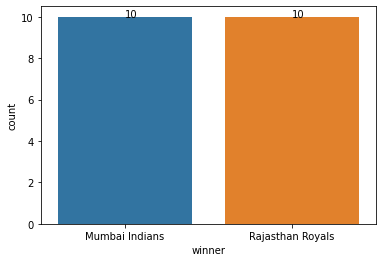

In [328]:
sns.countplot(df3['winner'])

plt.text(1,10,str(10))
plt.text(0,10,str(10))

In [329]:
df3['toss_decision'].value_counts()

field    11
bat       9
Name: toss_decision, dtype: int64

In [330]:
matches_played=pd.concat([df1['team1'],df1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


Team  Total Matches  wins
0               Mumbai Indians            187   109
1  Royal Challengers Bangalore            180   100
2        Kolkata Knight Riders            178    92
3               Delhi Capitals            177    84
4              Kings XI Punjab            176    82
5          Chennai Super Kings            164    77
6             Rajasthan Royals            147    75
7          Sunrisers Hyderabad            108    58

In [331]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [332]:
total=df1.groupby('team1')['id'].count() + df1.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

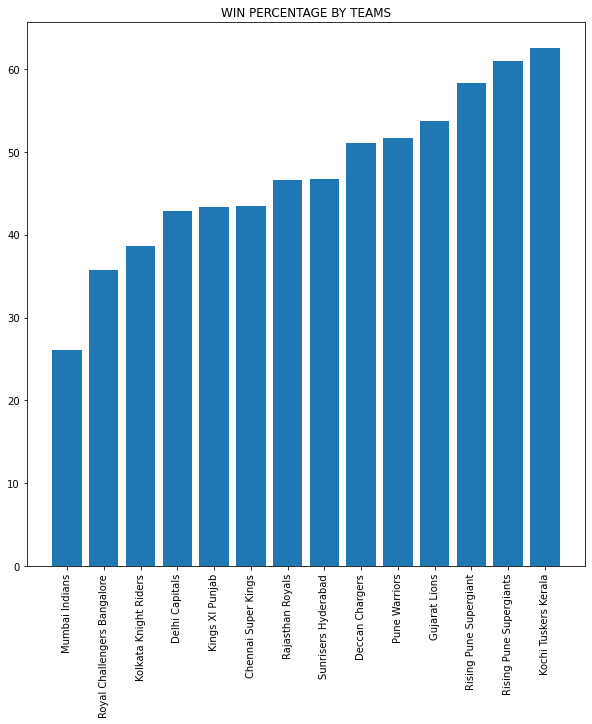

In [333]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((df1['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [334]:
last_3=df3[df3['season']>2016]
last_3['winner'].value_counts()

Rajasthan Royals    4
Name: winner, dtype: int64

Text(0, 4, '4')

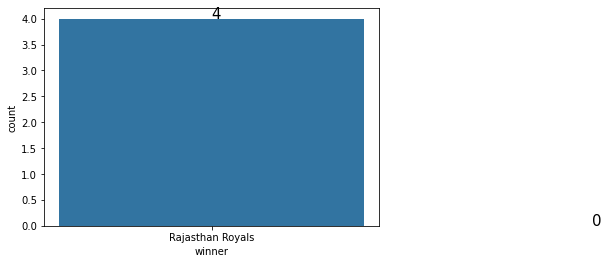

In [335]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,0,str(0),fontsize=15)
plt.text(0,4,str(4),fontsize=15)

In [336]:
# Above analysis shows that for past three years MI has not beaten RR in any of their match.

# QUES 3

In [337]:
df4= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
df4=df4[(df4['batsman'] == 'KA Pollard') | (df4['batsman'] == 'Ishan Kishan') | (df4['batsman'] == 'Q de Kock') |  (df4['batsman'] == 'HH Pandya')]
df4=df4[(df4['bowling_team'] == 'Rajasthan Royals')]
df4


match_id      bowling_team     batsman  batsman_runs  ball
51731        219  Rajasthan Royals  KA Pollard             1     4
51742        219  Rajasthan Royals  KA Pollard             1     2
51744        219  Rajasthan Royals  KA Pollard             1     4
51750        219  Rajasthan Royals  KA Pollard             1     4
51752        219  Rajasthan Royals  KA Pollard             4     6
...          ...               ...         ...           ...   ...
173372     11327  Rajasthan Royals   HH Pandya             1     4
173373     11327  Rajasthan Royals   HH Pandya             2     5
173374     11327  Rajasthan Royals   HH Pandya             6     6
173375     11327  Rajasthan Royals   HH Pandya             1     7
173377     11327  Rajasthan Royals   HH Pandya             0     1

[478 rows x 5 columns]

In [338]:
balls1=df4.groupby('batsman').agg({'ball':'count'})
balls1

ball
batsman           
HH Pandya       55
Ishan Kishan    56
KA Pollard     213
Q de Kock      154

In [339]:
#Balls Faced :
Ishan_Kishan_balls_faced=55
KA_Pollard_balls_faced=56
Q_de_Kock_balls_faced=213
HH_Pandya_balls_faced=154

In [340]:
df5=df4.groupby('batsman').agg({'batsman_runs':'sum'})
df5

batsman_runs
batsman                   
HH Pandya               97
Ishan Kishan            75
KA Pollard             295
Q de Kock              219

In [341]:
#Total runs scored by batsman VS RR:
Ishan_Kishan_total_runs=75
KA_Pollard_total_runs=295
Q_de_Kock_total_runs=219
HH_Pandya_total_runs=97


In [342]:
df6=df4[(df4['batsman'] == 'KA Pollard') | (df4['batsman'] == 'Ishan Kishan') | (df4['batsman'] == 'Q de Kock') | (df4['batsman'] == 'HH Pandya') ]
df6=df6[(df6['bowling_team'] == 'Rajasthan Royals')]
df6=df6[(df6['batsman_runs'] == 4) | (df6['batsman_runs'] == 6)]
df6


match_id      bowling_team     batsman  batsman_runs  ball
51752        219  Rajasthan Royals  KA Pollard             4     6
51756        219  Rajasthan Royals  KA Pollard             4     4
51762        219  Rajasthan Royals  KA Pollard             4     3
51763        219  Rajasthan Royals  KA Pollard             6     4
70587        299  Rajasthan Royals  KA Pollard             4     3
...          ...               ...         ...           ...   ...
173329     11327  Rajasthan Royals   Q de Kock             6     4
173360     11327  Rajasthan Royals  KA Pollard             6     4
173363     11327  Rajasthan Royals   HH Pandya             4     1
173371     11327  Rajasthan Royals   HH Pandya             4     3
173374     11327  Rajasthan Royals   HH Pandya             6     6

[89 rows x 5 columns]

In [343]:
df7=df6.groupby('batsman').agg({'batsman_runs':'sum'})
df7

batsman_runs
batsman                   
HH Pandya               64
Ishan Kishan            42
KA Pollard             190
Q de Kock              126

In [344]:
#Total runs scored by batsman (including 4 and 6 ONLY) VS RR:
Ishan_Kishan_runs=42
KA_Pollard_runs=190
Q_de_Kock_runs=126
HH_Pandya_runs=64



In [345]:
runs_scored_through_1_2_3_VS_RR=df5-df7
runs_scored_through_1_2_3_VS_RR

batsman_runs
batsman                   
HH Pandya               33
Ishan Kishan            33
KA Pollard             105
Q de Kock               93

In [346]:
#Total runs scored by batsman (Excluding 4 and 6 ONLY) VS RR:
Ishan_Kishan_runs_1_2_3=33
KA_Pollard_runs_1_2_3=33
Q_de_Kock_runs_1_2_3=105
HH_Pandya_runs_1_2_3=93


In [347]:
ratio1=df7/df5
ratio1

batsman_runs
batsman                   
HH Pandya         0.659794
Ishan Kishan      0.560000
KA Pollard        0.644068
Q de Kock         0.575342

In [348]:
#Pollard has the highest ratio among MI Batsman vs RR (excluding HH Pandya for QUES 3**)

In [349]:
df8= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
df8=df8[(df8['batsman'] == 'BA Stokes') | (df8['batsman'] == 'SPD Smith') | (df8['batsman'] == 'SV Samson')]
df8=df8[(df8['bowling_team'] == 'Mumbai Indians')]
df8

match_id    bowling_team    batsman  batsman_runs  ball
393            2  Mumbai Indians  SPD Smith             0     2
394            2  Mumbai Indians  SPD Smith             1     3
396            2  Mumbai Indians  SPD Smith             2     5
397            2  Mumbai Indians  SPD Smith             0     6
399            2  Mumbai Indians  SPD Smith             1     2
...          ...             ...        ...           ...   ...
173488     11327  Mumbai Indians  SPD Smith             1     4
173489     11327  Mumbai Indians  SPD Smith             4     5
173490     11327  Mumbai Indians  SPD Smith             2     6
173493     11327  Mumbai Indians  SPD Smith             1     3
173495     11327  Mumbai Indians  SPD Smith             1     5

[673 rows x 5 columns]

In [350]:
balls=df8.groupby('batsman').agg({'ball':'count'})
balls

ball
batsman        
BA Stokes    58
SPD Smith   323
SV Samson   292

In [351]:
#Balls Faced :
SPD_Smith_balls_faced=323
SV_Samson_balls_faced=292


In [352]:
df9=df8.groupby('batsman').agg({'batsman_runs':'sum'})
df9

batsman_runs
batsman                
BA Stokes            80
SPD Smith           412
SV Samson           400

In [353]:
#Total runs scored by batsman VS MI:
SPD_Smith_total_runs=412
SV_Samson_total_runs=400

In [354]:
df10= df[['match_id','bowling_team','batsman','batsman_runs']]
df10=df10[(df10['batsman'] == 'BA Stokes') | (df10['batsman'] == 'SPD Smith') | (df10['batsman'] == 'SV Samson')]
df10=df10[(df10['bowling_team'] == 'Mumbai Indians')]
df10=df10[(df10['batsman_runs'] == 4) | (df10['batsman_runs'] == 6)]
df10

match_id    bowling_team    batsman  batsman_runs
404            2  Mumbai Indians  SPD Smith             4
418            2  Mumbai Indians  SPD Smith             4
443            2  Mumbai Indians  BA Stokes             4
448            2  Mumbai Indians  SPD Smith             4
450            2  Mumbai Indians  SPD Smith             4
...          ...             ...        ...           ...
173420     11327  Mumbai Indians  SPD Smith             6
173424     11327  Mumbai Indians  SV Samson             6
173433     11327  Mumbai Indians  SPD Smith             4
173479     11327  Mumbai Indians  SPD Smith             4
173489     11327  Mumbai Indians  SPD Smith             4

[105 rows x 4 columns]

In [355]:
df11=df10.groupby('batsman').agg({'batsman_runs':'sum'})
df11

batsman_runs
batsman                
BA Stokes            38
SPD Smith           200
SV Samson           228

In [356]:
#Total runs scored by batsman VS MI(including 4 and 6 ONLY):
SPD_Smith_runs=200
SV_Samson_runs=228

In [357]:
runs_scored_through_1_2_3_VS_MI=df9-df11
runs_scored_through_1_2_3_VS_MI

batsman_runs
batsman                
BA Stokes            42
SPD Smith           212
SV Samson           172

In [358]:
#Total runs scored by batsman (Excluding 4 and 6 ONLY) VS MI:
SPD_Smith_runs_1_2_3=212
SV_Samson_runs_1_2_3=172


In [359]:
ratio2=df11/df9
ratio2

batsman_runs
batsman                
BA Stokes      0.475000
SPD Smith      0.485437
SV Samson      0.570000

In [360]:
#Samson has the highest ratio among RR Batsman vs MI
#Analysing above shows Pollard and Samson but in current scenerio IPL 2020 De Kock is the highest run scorer for them.
#So I will go for Samson or De Kock

 # QUES 2

In [361]:
#Considering batsman who have played more than 10 balls or more than that..... 

In [362]:
Smith_BIS=[(SPD_Smith_total_runs + SPD_Smith_runs - (SPD_Smith_runs_1_2_3)*0.5)/(SPD_Smith_balls_faced)]
Smith_BIS

[1.5665634674922602]

In [363]:
Samson_BIS=[(SV_Samson_total_runs + SV_Samson_runs - (SV_Samson_runs_1_2_3)*0.5)/(SV_Samson_balls_faced)]
Samson_BIS

[1.856164383561644]

In [364]:
Pollard_BIS=[(KA_Pollard_total_runs + KA_Pollard_runs - (KA_Pollard_runs_1_2_3)*0.5)/(KA_Pollard_balls_faced)]
Pollard_BIS

[8.366071428571429]

In [365]:
HH_Pandya_BIS=[(HH_Pandya_total_runs + HH_Pandya_runs - (HH_Pandya_runs_1_2_3)*0.5)/(HH_Pandya_balls_faced)]
HH_Pandya_BIS

[0.7435064935064936]

In [366]:
Ishan_Kishan_BIS=[(Ishan_Kishan_total_runs + Ishan_Kishan_runs - (Ishan_Kishan_runs_1_2_3)*0.5)/(Ishan_Kishan_balls_faced)]
Ishan_Kishan_BIS

[1.8272727272727274]

In [367]:
Q_de_Kock_BIS=[(Q_de_Kock_total_runs + Q_de_Kock_runs - (Q_de_Kock_runs_1_2_3)*0.5)/(Q_de_Kock_balls_faced)]
Q_de_Kock_BIS

[1.3732394366197183]

In [368]:
# Pollard and Kishan have the highest after considering all the options...

# QUES 4

In [369]:
a= df[['match_id','bowling_team','batting_team','total_runs','ball','over']]
a=a[(a['batting_team'] == 'Rajasthan Royals') & (a['bowling_team'] == 'Mumbai Indians')]
a

match_id    bowling_team      batting_team  total_runs  ball  over
20024         86  Mumbai Indians  Rajasthan Royals           0     1     1
20025         86  Mumbai Indians  Rajasthan Royals           1     2     1
20026         86  Mumbai Indians  Rajasthan Royals           1     3     1
20027         86  Mumbai Indians  Rajasthan Royals           0     4     1
20028         86  Mumbai Indians  Rajasthan Royals           1     5     1
...          ...             ...               ...         ...   ...   ...
173493     11327  Mumbai Indians  Rajasthan Royals           1     3    19
173494     11327  Mumbai Indians  Rajasthan Royals           1     4    19
173495     11327  Mumbai Indians  Rajasthan Royals           1     5    19
173496     11327  Mumbai Indians  Rajasthan Royals           1     6    19
173497     11327  Mumbai Indians  Rajasthan Royals           4     1    20

[2389 rows x 6 columns]

In [370]:
a=a.assign(cum_sum=a['total_runs'].cumsum())
a

match_id    bowling_team      batting_team  total_runs  ball  over  \
20024         86  Mumbai Indians  Rajasthan Royals           0     1     1   
20025         86  Mumbai Indians  Rajasthan Royals           1     2     1   
20026         86  Mumbai Indians  Rajasthan Royals           1     3     1   
20027         86  Mumbai Indians  Rajasthan Royals           0     4     1   
20028         86  Mumbai Indians  Rajasthan Royals           1     5     1   
...          ...             ...               ...         ...   ...   ...   
173493     11327  Mumbai Indians  Rajasthan Royals           1     3    19   
173494     11327  Mumbai Indians  Rajasthan Royals           1     4    19   
173495     11327  Mumbai Indians  Rajasthan Royals           1     5    19   
173496     11327  Mumbai Indians  Rajasthan Royals           1     6    19   
173497     11327  Mumbai Indians  Rajasthan Royals           4     1    20   

        cum_sum  
20024         0  
20025         1  
20026         2  
20027         2  
20028         3  
...         ...  
173493     3190  
173494     3191  
173495     3192  
173496     3193  
173497     3197  

[2389 rows x 7 columns]

In [371]:
balls1=[]
ids=a['match_id'].unique()
for id in ids:
    ball=0
    total_runs=0
    for i in range(len(a)):
        if(a['match_id'].iloc[i]==id):
            ball+=1
            total_runs=total_runs + a['total_runs'].iloc[i]
            if(a['total_runs']>100):
                break
            else:
                continue
print(balls1)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [406]:
b=a.groupby('match_id').agg({'ball':'sum'})
b

ball
match_id      
86         377
113        462
160        449
176        456
219        441
267        386
299        288
319        431
377        507
403        479
447        448
456        458
501        469
513        441
526        429
549        477
7914       452
7940       406
11318      419
11327      400

In [405]:
c= df[['match_id','bowling_team','batting_team','total_runs','ball','over']]
c=c[(c['batting_team'] == 'Mumbai Indians') & (c['bowling_team'] == 'Rajasthan Royals')]
c

match_id      bowling_team    batting_team  total_runs  ball  over
20127         86  Rajasthan Royals  Mumbai Indians           0     1     1
20128         86  Rajasthan Royals  Mumbai Indians           0     2     1
20129         86  Rajasthan Royals  Mumbai Indians           0     3     1
20130         86  Rajasthan Royals  Mumbai Indians           1     4     1
20131         86  Rajasthan Royals  Mumbai Indians           0     5     1
...          ...               ...             ...         ...   ...   ...
173378     11327  Rajasthan Royals  Mumbai Indians           1     2    20
173379     11327  Rajasthan Royals  Mumbai Indians           1     3    20
173380     11327  Rajasthan Royals  Mumbai Indians           1     4    20
173381     11327  Rajasthan Royals  Mumbai Indians           0     5    20
173382     11327  Rajasthan Royals  Mumbai Indians           6     6    20

[2414 rows x 6 columns]

In [ ]:
balls2=[]
ids=a['match_id'].unique()
for id in ids:
    ball=0
    total_runs=0
    for i in range(len(a)):
        if(a['match_id'].iloc[i]==id):
            ball+=1
            total_runs=total_runs + a['total_runs'].iloc[i]
            if(a['total_runs']>100):
                break
            else:
                continue
print(balls2)



# QUES 5

In [372]:
df12= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed','batsman_runs']]
df12=df12[(df12['bowler'] == 'J Archer') | (df12['bowler'] == 'R Tewatia') | (df12['bowler'] == 'BA Stokes')]
df12=df12[(df12['batting_team'] == 'Mumbai Indians')]
df12['runs against bowler'] = df12['total_runs'] - (df12['bye_runs'] + df12['legbye_runs'])
df12=df12.fillna(0)
df12['player_dismissed'] = df12['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
df12


match_id    batting_team     bowler  ball  over  bye_runs  \
267            2  Mumbai Indians  BA Stokes     1     4         0   
268            2  Mumbai Indians  BA Stokes     2     4         0   
269            2  Mumbai Indians  BA Stokes     3     4         0   
270            2  Mumbai Indians  BA Stokes     4     4         0   
271            2  Mumbai Indians  BA Stokes     5     4         0   
...          ...             ...        ...   ...   ...       ...   
173378     11327  Mumbai Indians   J Archer     2    20         0   
173379     11327  Mumbai Indians   J Archer     3    20         0   
173380     11327  Mumbai Indians   J Archer     4    20         0   
173381     11327  Mumbai Indians   J Archer     5    20         0   
173382     11327  Mumbai Indians   J Archer     6    20         0   

        legbye_runs  total_runs  player_dismissed  batsman_runs  \
267               0           1                 0             1   
268               0           0                 0             0   
269               0           0                 0             0   
270               0           6                 0             6   
271               0           6                 0             6   
...             ...         ...               ...           ...   
173378            0           1                 0             1   
173379            0           1                 0             1   
173380            0           1                 0             1   
173381            0           0                 0             0   
173382            0           6                 0             6   

        runs against bowler  
267                       1  
268                       0  
269                       0  
270                       6  
271                       6  
...                     ...  
173378                    1  
173379                    1  
173380                    1  
173381                    0  
173382                    6  

[239 rows x 11 columns]

In [373]:
df13=df12.groupby('bowler').agg({'player_dismissed':'sum'})
df13

player_dismissed
bowler                     
BA Stokes                 5
J Archer                  9
R Tewatia                 4

In [374]:
# Total Wickets VS MI:
BA_Stokes_wickets=5
J_Archer_wickets=9
R_Tewatia_wickets=4

In [375]:
#Calculating Total Balls.....
total_balls=df12.groupby('bowler').agg({'runs against bowler':'count'})
total_balls

runs against bowler
bowler                        
BA Stokes                   94
J Archer                   100
R Tewatia                   45

In [376]:
# Total dot balls VS MI:
BA_Stokes_balls=94
J_Archer_balls=100
R_Tewatia_balls=45

In [377]:
df14= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed']]
df14=df14[(df14['bowler'] == 'J Archer') | (df14['bowler'] == 'R Tewatia') | (df14['bowler'] == 'BA Stokes')]
df14=df14[(df14['batting_team'] == 'Mumbai Indians')]
df14['runs against bowler'] = df14['total_runs'] - (df14['bye_runs'] + df14['legbye_runs'])
df14=df14.fillna(0)
df14['player_dismissed'] = df14['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
#To calculate dot balls ....
df14['runs against bowler'] = df14['runs against bowler'].apply(lambda x: 1  if x== 0 else 0)

df14


match_id    batting_team     bowler  ball  over  bye_runs  \
267            2  Mumbai Indians  BA Stokes     1     4         0   
268            2  Mumbai Indians  BA Stokes     2     4         0   
269            2  Mumbai Indians  BA Stokes     3     4         0   
270            2  Mumbai Indians  BA Stokes     4     4         0   
271            2  Mumbai Indians  BA Stokes     5     4         0   
...          ...             ...        ...   ...   ...       ...   
173378     11327  Mumbai Indians   J Archer     2    20         0   
173379     11327  Mumbai Indians   J Archer     3    20         0   
173380     11327  Mumbai Indians   J Archer     4    20         0   
173381     11327  Mumbai Indians   J Archer     5    20         0   
173382     11327  Mumbai Indians   J Archer     6    20         0   

        legbye_runs  total_runs  player_dismissed  runs against bowler  
267               0           1                 0                    0  
268               0           0                 0                    1  
269               0           0                 0                    1  
270               0           6                 0                    0  
271               0           6                 0                    0  
...             ...         ...               ...                  ...  
173378            0           1                 0                    0  
173379            0           1                 0                    0  
173380            0           1                 0                    0  
173381            0           0                 0                    1  
173382            0           6                 0                    0  

[239 rows x 10 columns]

In [378]:
df15=df14.groupby('bowler').agg({'runs against bowler':'sum'})
df15

runs against bowler
bowler                        
BA Stokes                   35
J Archer                    45
R Tewatia                   17

In [379]:
# Total dot balls VS MI:
BA_Stokes_dot_balls=35
J_Archer_dot_balls=45
R_Tewatia_dot_balls=17

In [380]:
df16= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed','batsman_runs']]
df16=df16[(df16['bowler'] == 'J Archer') | (df16['bowler'] == 'R Tewatia') | (df16['bowler'] == 'BA Stokes')]
df16=df16[(df16['batting_team'] == 'Mumbai Indians')]
df16['runs against bowler'] = df16['total_runs'] - (df16['bye_runs'] + df14['legbye_runs'])
df16=df16.fillna(0)
df16['player_dismissed'] = df16['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
df16['runs against bowler'] = df16['runs against bowler'].apply(lambda x: 1  if x== 0 else 0)
df16=df16[(df16['batsman_runs'] == 4) | (df16['batsman_runs'] == 6)]
df16


match_id    batting_team     bowler  ball  over  bye_runs  \
270            2  Mumbai Indians  BA Stokes     4     4         0   
271            2  Mumbai Indians  BA Stokes     5     4         0   
323            2  Mumbai Indians  BA Stokes     2    13         0   
365            2  Mumbai Indians  BA Stokes     6    19         0   
6635          28  Mumbai Indians  BA Stokes     4    13         0   
6647          28  Mumbai Indians  BA Stokes     4    15         0   
11807         50  Mumbai Indians  R Tewatia     2    14         0   
11810         50  Mumbai Indians  R Tewatia     5    14         0   
152340      7902  Mumbai Indians  R Tewatia     3     9         0   
152366      7902  Mumbai Indians  R Tewatia     5    13         0   
152367      7902  Mumbai Indians  R Tewatia     6    13         0   
152368      7902  Mumbai Indians  R Tewatia     7    13         0   
155176      7914  Mumbai Indians   J Archer     5     4         0   
155204      7914  Mumbai Indians  BA Stokes     2     9         0   
155216      7914  Mumbai Indians  BA Stokes     2    11         0   
155227      7914  Mumbai Indians   J Archer     1    13         0   
155267      7914  Mumbai Indians   J Archer     3    19         0   
155275      7914  Mumbai Indians  BA Stokes     5    20         0   
161459      7940  Mumbai Indians  BA Stokes     1     5         0   
161553      7940  Mumbai Indians  BA Stokes     1    20         0   
161555      7940  Mumbai Indians  BA Stokes     3    20         0   
165374     11139  Mumbai Indians  R Tewatia     1     8         0   
165379     11139  Mumbai Indians  R Tewatia     6     8         0   
171093     11318  Mumbai Indians   J Archer     1     5         0   
171094     11318  Mumbai Indians   J Archer     2     5         0   
171169     11318  Mumbai Indians   J Archer     5    17         0   
171179     11318  Mumbai Indians   J Archer     2    19         0   
171183     11318  Mumbai Indians   J Archer     6    19         0   
173286     11327  Mumbai Indians   J Archer     5     5         0   
173363     11327  Mumbai Indians   J Archer     1    18         0   
173382     11327  Mumbai Indians   J Archer     6    20         0   

        legbye_runs  total_runs  player_dismissed  batsman_runs  \
270               0           6                 0             6   
271               0           6                 0             6   
323               0           6                 0             6   
365               0           6                 0             6   
6635              0           4                 0             4   
6647              0           4                 0             4   
11807             0           6                 0             6   
11810             0           6                 0             6   
152340            0           6                 0             6   
152366            0           4                 0             4   
152367            0           6                 0             6   
152368            0           6                 0             6   
155176            0           4                 0             4   
155204            0           6                 0             6   
155216            0           4                 0             4   
155227            0           4                 0             4   
155267            0           4                 0             4   
155275            0           4                 0             4   
161459            0           4                 0             4   
161553            0           6                 0             6   
161555            0           4                 0             4   
165374            0           4                 0             4   
165379            0           6                 0             6   
171093            0           4                 0             4   
171094            0           6                 0             6   
171169            0           4                 0        

In [381]:
df17=df16.groupby('bowler').agg({'batsman_runs':'sum'})
df17

batsman_runs
bowler                 
BA Stokes            60
J Archer             50
R Tewatia            44

In [382]:
# Total runs for RR Bowlers  VS MI:
BA_Stokes_runs_given=60
J_Archer_runs_given=50
R_Tewatia_runs_given=44


In [383]:
df18=df16.groupby('bowler').agg({'batsman_runs':'count'})
df18

batsman_runs
bowler                 
BA Stokes            12
J Archer             11
R Tewatia             8

In [384]:
# Total Boundaries for RR Bowlers  VS MI:
BA_Stokes_boundaries_given=12
J_Archer_boundaries_given=11
R_Tewatia_boundaries_given=8


In [385]:
df19= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed','batsman_runs']]
df19=df19[(df19['bowler'] == 'RD Chahar') | (df19['bowler'] == 'TA Boult') | (df19['bowler'] == 'JJ Bumrah')]
df19=df19[(df19['batting_team'] == 'Rajasthan Royals')]
df19['runs against bowler'] = df19['total_runs'] - (df19['bye_runs'] + df19['legbye_runs'])
df19=df19.fillna(0)
df19['player_dismissed'] = df19['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
df19


match_id      batting_team     bowler  ball  over  bye_runs  \
118789       501  Rajasthan Royals  JJ Bumrah     1     1         0   
118790       501  Rajasthan Royals  JJ Bumrah     2     1         0   
118791       501  Rajasthan Royals  JJ Bumrah     3     1         0   
118792       501  Rajasthan Royals  JJ Bumrah     4     1         0   
118793       501  Rajasthan Royals  JJ Bumrah     5     1         0   
...          ...               ...        ...   ...   ...       ...   
177290     11344  Rajasthan Royals   TA Boult     3    20         0   
177291     11344  Rajasthan Royals   TA Boult     4    20         0   
177292     11344  Rajasthan Royals   TA Boult     5    20         0   
177293     11344  Rajasthan Royals   TA Boult     6    20         0   
177294     11344  Rajasthan Royals   TA Boult     7    20         0   

        legbye_runs  total_runs  player_dismissed  batsman_runs  \
118789            0           1                 0             1   
118790            0           0                 0             0   
118791            0           0                 0             0   
118792            0           0                 0             0   
118793            0           1                 0             1   
...             ...         ...               ...           ...   
177290            0           1                 0             1   
177291            0           6                 0             6   
177292            0           2                 0             1   
177293            0           0                 0             0   
177294            0           0                 1             0   

        runs against bowler  
118789                    1  
118790                    0  
118791                    0  
118792                    0  
118793                    1  
...                     ...  
177290                    1  
177291                    6  
177292                    2  
177293                    0  
177294                    0  

[277 rows x 11 columns]

In [386]:
df20=df19.groupby('bowler').agg({'player_dismissed':'sum'})
df20

player_dismissed
bowler                     
JJ Bumrah                 7
RD Chahar                 4
TA Boult                  7

In [387]:
# Total Wickets VS RR:
JJ_Bumrah_wickets=7
RD_Chahar_wickets=4
TA_Boult_wickets=7


In [388]:
#Calculating Total Balls.....
total_balls=df19.groupby('bowler').agg({'runs against bowler':'count'})
total_balls

runs against bowler
bowler                        
JJ Bumrah                  137
RD Chahar                   48
TA Boult                    92

In [389]:
# Total balls VS RR:
JJ_Bumrah_balls=137
RD_Chahar_balls=48
TA_Boult_balls=92


In [390]:
df21= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed']]
df21=df21[(df21['bowler'] == 'RD Chahar') | (df21['bowler'] == 'TA Boult') | (df21['bowler'] == 'JJ Bumrah')]
df21=df21[(df21['batting_team'] == 'Rajasthan Royals')]
df21['runs against bowler'] = df21['total_runs'] - (df21['bye_runs'] + df21['legbye_runs'])
df21=df21.fillna(0)
df21['player_dismissed'] = df21['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
#To calculate dot balls ....
df21['runs against bowler'] = df21['runs against bowler'].apply(lambda x: 1  if x== 0 else 0)
df21


match_id      batting_team     bowler  ball  over  bye_runs  \
118789       501  Rajasthan Royals  JJ Bumrah     1     1         0   
118790       501  Rajasthan Royals  JJ Bumrah     2     1         0   
118791       501  Rajasthan Royals  JJ Bumrah     3     1         0   
118792       501  Rajasthan Royals  JJ Bumrah     4     1         0   
118793       501  Rajasthan Royals  JJ Bumrah     5     1         0   
...          ...               ...        ...   ...   ...       ...   
177290     11344  Rajasthan Royals   TA Boult     3    20         0   
177291     11344  Rajasthan Royals   TA Boult     4    20         0   
177292     11344  Rajasthan Royals   TA Boult     5    20         0   
177293     11344  Rajasthan Royals   TA Boult     6    20         0   
177294     11344  Rajasthan Royals   TA Boult     7    20         0   

        legbye_runs  total_runs  player_dismissed  runs against bowler  
118789            0           1                 0                    0  
118790            0           0                 0                    1  
118791            0           0                 0                    1  
118792            0           0                 0                    1  
118793            0           1                 0                    0  
...             ...         ...               ...                  ...  
177290            0           1                 0                    0  
177291            0           6                 0                    0  
177292            0           2                 0                    0  
177293            0           0                 0                    1  
177294            0           0                 1                    1  

[277 rows x 10 columns]

In [391]:
df22=df21.groupby('bowler').agg({'runs against bowler':'sum'})
df22

runs against bowler
bowler                        
JJ Bumrah                   51
RD Chahar                   16
TA Boult                    35

In [392]:
# Total dot balls VS RR:
JJ_Bumrah_dot_balls=51
RD_Chahar_dot_balls=16
TA_Boult_dot_balls=35


In [393]:
df23= df[['match_id','batting_team','bowler','ball','over','bye_runs','legbye_runs','total_runs','player_dismissed','batsman_runs']]
df23=df23[(df23['bowler'] == 'RD Chahar') | (df23['bowler'] == 'TA Boult') | (df23['bowler'] == 'JJ Bumrah')]
df23=df23[(df23['batting_team'] == 'Rajasthan Royals')]
df23['runs against bowler'] = df23['total_runs'] - (df23['bye_runs'] + df23['legbye_runs'])
df23=df23.fillna(0)
df23['player_dismissed'] = df23['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
df23['runs against bowler'] = df23['runs against bowler'].apply(lambda x: 1  if x== 0 else 0)
df23=df23[(df23['batsman_runs'] == 4) | (df23['batsman_runs'] == 6)]
df23
df23


match_id      batting_team     bowler  ball  over  bye_runs  \
118902       501  Rajasthan Royals  JJ Bumrah     6    18         0   
118913       501  Rajasthan Royals  JJ Bumrah     4    20         0   
121535       513  Rajasthan Royals  JJ Bumrah     6     4         0   
121597       513  Rajasthan Royals  JJ Bumrah     1    15         0   
121600       513  Rajasthan Royals  JJ Bumrah     4    15         0   
121627       513  Rajasthan Royals  JJ Bumrah     7    19         0   
125548       529  Rajasthan Royals   TA Boult     2     2         0   
125565       529  Rajasthan Royals   TA Boult     7     4         0   
125612       529  Rajasthan Royals   TA Boult     3    12         0   
125615       529  Rajasthan Royals   TA Boult     6    12         0   
125658       529  Rajasthan Royals   TA Boult     6    19         0   
151673      7899  Rajasthan Royals   TA Boult     3     3         0   
151685      7899  Rajasthan Royals   TA Boult     3     5         0   
151686      7899  Rajasthan Royals   TA Boult     4     5         0   
151688      7899  Rajasthan Royals   TA Boult     6     5         0   
155391      7914  Rajasthan Royals  JJ Bumrah     1    19         0   
155395      7914  Rajasthan Royals  JJ Bumrah     5    19         0   
155397      7914  Rajasthan Royals  JJ Bumrah     7    19         0   
157971      7925  Rajasthan Royals   TA Boult     2     2         0   
158017      7925  Rajasthan Royals   TA Boult     5     9         0   
158037      7925  Rajasthan Royals   TA Boult     6    12         0   
161559      7940  Rajasthan Royals  JJ Bumrah     1     1         0   
161565      7940  Rajasthan Royals  JJ Bumrah     7     1         0   
161603      7940  Rajasthan Royals  JJ Bumrah     6     7         0   
161648      7940  Rajasthan Royals  JJ Bumrah     3    15         0   
161649      7940  Rajasthan Royals  JJ Bumrah     4    15         0   
171222     11318  Rajasthan Royals  JJ Bumrah     1     6         0   
171226     11318  Rajasthan Royals  JJ Bumrah     5     6         0   
171237     11318  Rajasthan Royals  RD Chahar     3     8         0   
171260     11318  Rajasthan Royals  RD Chahar     1    12         0   
171263     11318  Rajasthan Royals  RD Chahar     4    12         0   
171306     11318  Rajasthan Royals  JJ Bumrah     5    19         0   
173401     11327  Rajasthan Royals  RD Chahar     1     4         0   
173402     11327  Rajasthan Royals  RD Chahar     2     4         0   
173406     11327  Rajasthan Royals  RD Chahar     6     4         0   
173468     11327  Rajasthan Royals  RD Chahar     2    15         0   
173479     11327  Rajasthan Royals  JJ Bumrah     1    17         0   
177288     11344  Rajasthan Royals   TA Boult     1    20         0   
177291     11344  Rajasthan Royals   TA Boult     4    20         0   

        legbye_runs  total_runs  player_dismissed  batsman_runs  \
118902            0           6                 0             6   
118913            0           4                 0             4   
121535            0           4                 0             4   
121597            0           4                 0             4   
121600            0           4                 0             4   
121627            0           6                 0             6   
125548            0           4                 0             4   
125565            0           4                 0             4   
125612            0           4                 0             4   
125615            0           4                 0             4   
125658            0           4                 0             4   
151673            0           4                 0             4   
151685            0           4                 0             4   
151686            0           6                 0             6   
151688            0           4                 0             4   
155391            0           4                 0             4   
155395            0         

In [394]:
df24=df23.groupby('bowler').agg({'batsman_runs':'sum'})
df24

batsman_runs
bowler                 
JJ Bumrah            78
RD Chahar            36
TA Boult             62

In [395]:
# Total runs for MI Bowlers  VS RR:
JJ_Bumrah_runs_given=78
RD_Chahar_runs_given=36
TA_Boult_runs_given=62

In [396]:
df25=df23.groupby('bowler').agg({'batsman_runs':'count'})
df25

batsman_runs
bowler                 
JJ Bumrah            18
RD Chahar             7
TA Boult             14

In [397]:
# Total boundaries for MI Bowlers  VS RR:
JJ_Bumrah_boundaries_given=18
RD_Chahar_boundaries_given=7
TA_Boult_boundaries_given=14

In [398]:
#BLS:
Archer_BLS=[(J_Archer_wickets + J_Archer_dot_balls*2 -(J_Archer_runs_given/J_Archer_boundaries_given))/(J_Archer_balls - J_Archer_dot_balls*2.5)]   
Archer_BLS

[-7.556363636363637]

In [399]:
Boult_BLS=[(TA_Boult_wickets + TA_Boult_dot_balls*2 -(TA_Boult_runs_given/TA_Boult_boundaries_given))/(TA_Boult_balls - TA_Boult_dot_balls*2.5)]   
Boult_BLS

[16.126984126984127]

In [400]:
RD_Chahar_BLS=[(RD_Chahar_wickets + RD_Chahar_dot_balls*2 -(RD_Chahar_runs_given/RD_Chahar_boundaries_given))/(RD_Chahar_balls - RD_Chahar_dot_balls*2.5)]   
RD_Chahar_BLS

[3.857142857142857]

In [401]:
JJ_Bumrah_BLS=[(JJ_Bumrah_wickets + JJ_Bumrah_dot_balls*2 -(JJ_Bumrah_runs_given/JJ_Bumrah_boundaries_given))/(JJ_Bumrah_balls - JJ_Bumrah_dot_balls*2.5)]   
JJ_Bumrah_BLS

[11.017543859649123]

In [402]:
BA_Stokes_BLS=[(BA_Stokes_wickets + BA_Stokes_dot_balls*2 -(BA_Stokes_runs_given/BA_Stokes_boundaries_given))/(BA_Stokes_balls - BA_Stokes_dot_balls*2.5)]   
BA_Stokes_BLS

[10.76923076923077]

In [403]:
R_Tewatia_BLS=[(R_Tewatia_wickets + R_Tewatia_dot_balls*2 -(R_Tewatia_runs_given/R_Tewatia_boundaries_given))/(R_Tewatia_balls - R_Tewatia_dot_balls*2.5)]   
R_Tewatia_BLS

[13.0]

In [404]:
#Boult has the highest BLS among all.